In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
data= pd.read_csv("C:/Users/Cold min/OneDrive/바탕 화면/인공지능/abalone.data" )


In [18]:
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [19]:
df.isnull().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    df[i]=le.fit_transform(data[i])

In [6]:
df.head

<bound method NDFrame.head of       M  0.455  0.365  0.095  0.514  0.2245  0.101  0.15  15
0     2     45     36     17    285     178     94   113   6
1     0     81     67     26    962     480    280   374   8
2     2     63     56     24    718     400    225   273   9
3     1     41     34     15    253     159     76    87   6
4     1     60     43     18    463     254    152   207   7
...  ..    ...    ...    ...    ...     ...    ...   ...  ..
4171  0     88     73     32   1289     698    475   442  10
4172  2     93     71     26   1411     832    426   463   9
4173  2     95     78     40   1727     994    571   550   8
4174  0    100     80     29   1610    1005    518   530   9
4175  2    117     94     38   2348    1461    732   813  11

[4176 rows x 9 columns]>

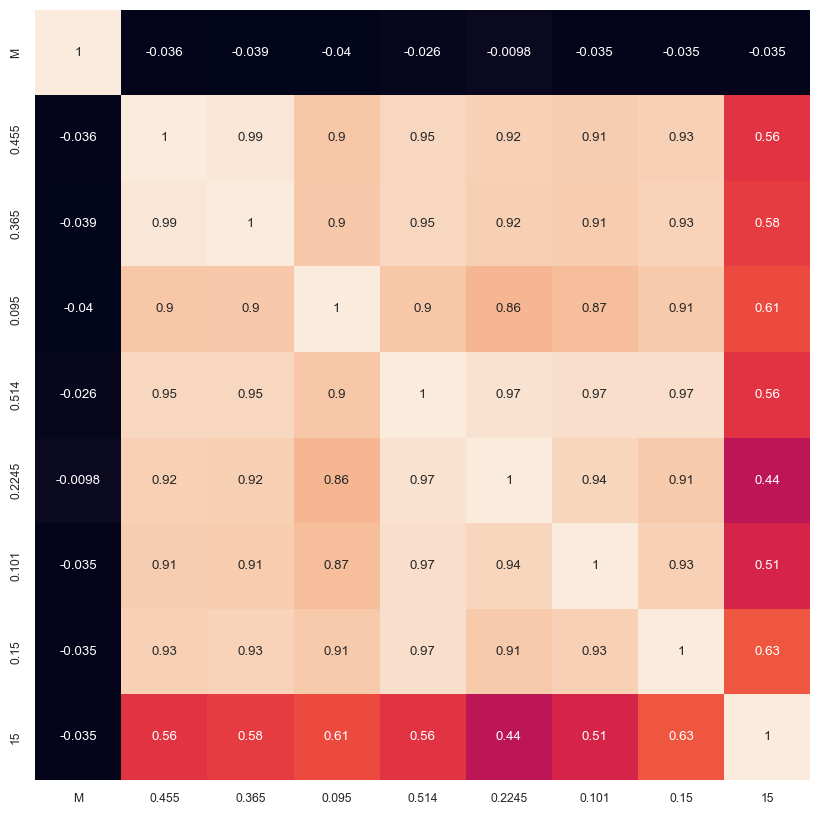

In [7]:
#상관 관계 행렬
data_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [34]:
# 데이터 분할
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder =  LabelEncoder()

X = df.drop(['0.15','M','15'], axis=1)
y = df['0.15']

y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(3340, 6)

In [36]:
y_train.shape

(3340, 926)

In [37]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (6,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                448       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [41]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/100
105/105 [==============================] - 0s 2ms/step - 

105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 63/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 64/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 65/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 66/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 67/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 68/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 69/100
105/105 [==============================] - 0s 2ms/step - loss:

In [46]:
test_mse_score

0.001082146423868835

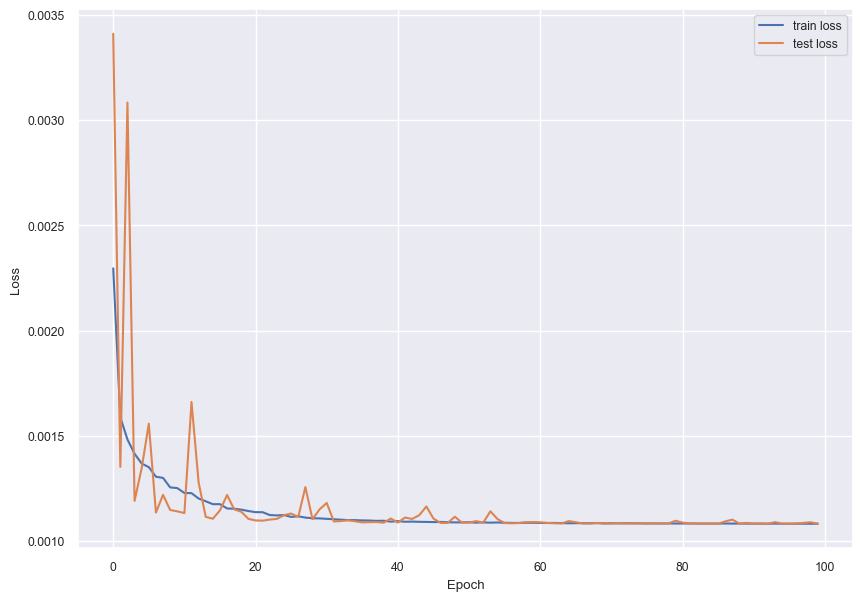

In [43]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

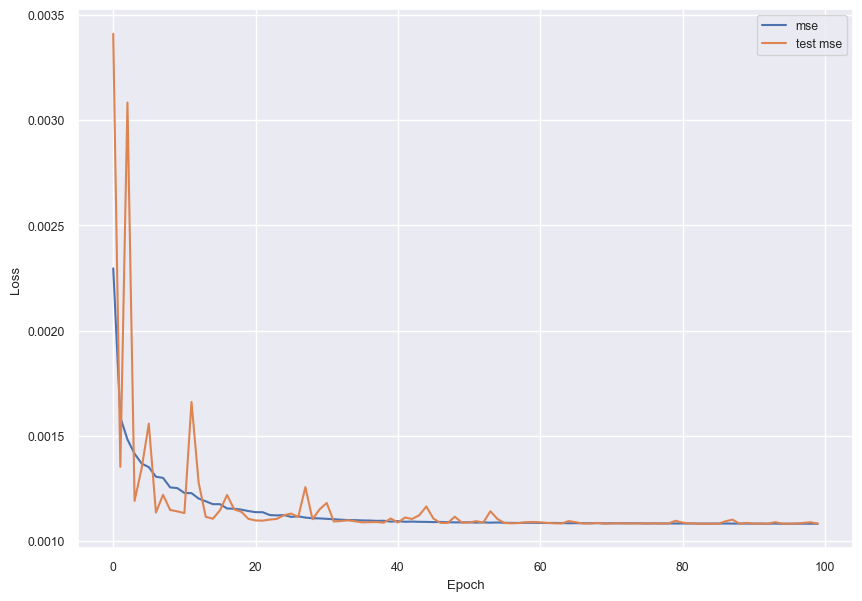

In [44]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()